# 分组透视

In [111]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.DataFrame({'A': ['foo', 'bar', 'foo', 'bar',
                         'foo', 'bar', 'foo', 'foo'],
                   'B': ['one', 'one', 'two', 'three',
                          'two', 'two', 'one', 'three'],
                   'C': np.random.randn(8),
                   'D': np.random.randn(8)})
print(df)

     A      B         C         D
0  foo    one -0.263448 -0.460318
1  bar    one -0.145251 -0.317205
2  foo    two  0.925623  0.600172
3  bar  three -0.018955 -1.244796
4  foo    two  1.731266  1.616143
5  bar    two  0.295611  0.809220
6  foo    one -0.502232  2.419620
7  foo  three  0.414881 -1.378825


sum函数进行汇总

In [112]:
df.groupby('A').sum()

,C,D
A,,
bar,0.131404,-0.752781
foo,2.306092,2.796792


In [113]:
df.groupby(['A', 'B']).sum()

C         D
A   B                        
bar one   -0.145251 -0.317205
    three -0.018955 -1.244796
    two    0.295611  0.809220
foo one   -0.765679  1.959302
    three  0.414881 -1.378825
    two    2.656890  2.216315

重塑（Reshaping）

In [114]:
tuples = list(zip(*[['bar', 'bar', 'baz', 'baz',
                         'foo', 'foo', 'qux', 'qux'],
                        ['one', 'two', 'one', 'two',
                         'one', 'two', 'one', 'two']]))
index = pd.MultiIndex.from_tuples(tuples, names=['first', 'second'])
print(index)
df = pd.DataFrame(np.random.randn(8, 2), index=index, columns=['A', 'B'])
df2 = df[:4]
print(df2)

MultiIndex([('bar', 'one'),
            ('bar', 'two'),
            ('baz', 'one'),
            ('baz', 'two'),
            ('foo', 'one'),
            ('foo', 'two'),
            ('qux', 'one'),
            ('qux', 'two')],
           names=['first', 'second'])
                     A         B
first second                    
bar   one     0.704622  1.501766
      two     0.044714  0.138637
baz   one    -0.606294  0.643049
      two    -0.855412  1.347289


压缩与解压缩

In [115]:
stacked = df2.stack()
print(stacked)

first  second   
bar    one     A    0.704622
               B    1.501766
       two     A    0.044714
               B    0.138637
baz    one     A   -0.606294
               B    0.643049
       two     A   -0.855412
               B    1.347289
dtype: float64


In [116]:
stacked.unstack()

A         B
first second                    
bar   one     0.704622  1.501766
      two     0.044714  0.138637
baz   one    -0.606294  0.643049
      two    -0.855412  1.347289

数据透视表（Pivot Tables）

In [117]:
df = pd.DataFrame({'A': ['one', 'one', 'two', 'three'] * 3,
                       'B': ['A', 'B', 'C'] * 4,
                       'C': ['foo', 'foo', 'foo', 'bar', 'bar', 'bar'] * 2,
                       'D': np.random.randn(12),
                       'E': np.random.randn(12)})

df

,A,B,C,D,E
0,one,A,foo,0.182220,-0.354765
1,one,B,foo,1.348324,0.718791
2,two,C,foo,1.275059,0.762297
3,three,A,bar,-0.881063,0.259609
4,one,B,bar,0.701751,0.578946
5,one,C,bar,-2.247337,0.173717
6,two,A,foo,-0.083006,0.410377
7,three,B,foo,0.815744,-1.660273
8,one,C,foo,0.503026,-0.103191
9,one,A,bar,1.151757,1.237929


In [118]:
pd.pivot_table(df, values='D', index=['A', 'B'], columns=['C'])

C             bar       foo
A     B                    
one   A  1.151757  0.182220
      B  0.701751  1.348324
      C -2.247337  0.503026
three A -0.881063       NaN
      B       NaN  0.815744
      C  0.030306       NaN
two   A       NaN -0.083006
      B -0.248259       NaN
      C       NaN  1.275059

# 可视化

<AxesSubplot:>

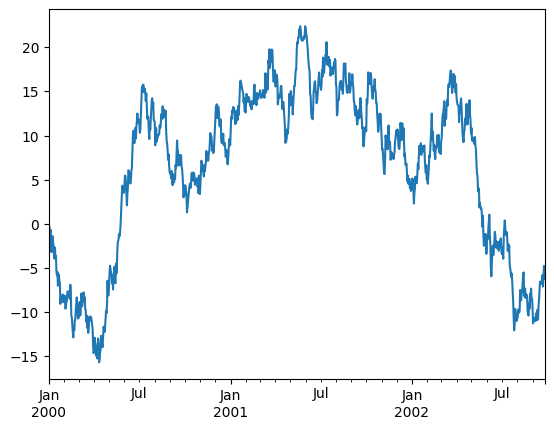

In [119]:
ts = pd.Series(np.random.randn(1000),index=pd.date_range('1/1/2000', periods=1000))
ts = ts.cumsum()
ts.plot()

<Figure size 640x480 with 0 Axes>

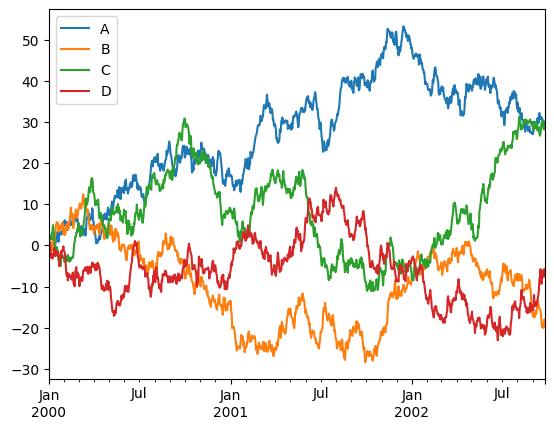

In [120]:
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index,
                     columns=['A', 'B', 'C', 'D'])
df = df.cumsum()
plt.figure()
df.plot()
plt.legend(loc='best')

In [121]:
df.to_csv('foo.csv')
pd.read_csv('foo.csv')

,Unnamed: 0,A,B,C,D
0,2000-01-01,0.417049,-1.585392,1.625395,1.311542
1,2000-01-02,-0.529805,-2.273150,1.306622,1.120614
2,2000-01-03,-0.275582,-2.161671,1.717612,0.231182
3,2000-01-04,-0.503680,0.602040,2.072070,-1.385930
4,2000-01-05,-1.106066,-0.551851,2.342913,-1.888011
...,...,...,...,...,...
995,2002-09-22,30.111923,-19.504182,30.386942,-6.321292
996,2002-09-23,29.730146,-20.066333,28.376434,-5.986138
997,2002-09-24,28.390642,-18.369120,28.214131,-7.625185
998,2002-09-25,30.090463,-17.905826,29.181295,-5.677238


In [122]:
df.to_excel('foo.xlsx', sheet_name='Sheet1')
pd.read_excel('foo.xlsx', 'Sheet1', index_col=None, na_values=['NA'])

,Unnamed: 0,A,B,C,D
0,2000-01-01,0.417049,-1.585392,1.625395,1.311542
1,2000-01-02,-0.529805,-2.273150,1.306622,1.120614
2,2000-01-03,-0.275582,-2.161671,1.717612,0.231182
3,2000-01-04,-0.503680,0.602040,2.072070,-1.385930
4,2000-01-05,-1.106066,-0.551851,2.342913,-1.888011
...,...,...,...,...,...
995,2002-09-22,30.111923,-19.504182,30.386942,-6.321292
996,2002-09-23,29.730146,-20.066333,28.376434,-5.986138
997,2002-09-24,28.390642,-18.369120,28.214131,-7.625185
998,2002-09-25,30.090463,-17.905826,29.181295,-5.677238
